In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import pydose_rt as PDRT

In [15]:
config = PDRT.MachineConfig(number_of_leaf_pairs=1, tpr_20_10=0.72)
print(config)

preset=None tpr_20_10=0.72 number_of_leaf_pairs=1 minimum_leaf_opening=5.0 minimum_jaw_opening=5.0 maximum_leaf_tip_overlap=150.0 maximum_jaw_speed=22.5 maximum_leaf_speed=22.5 minimum_gantry_angle_speed=0.1 maximum_gantry_angle_speed=6.0 maximum_gantry_angle_speed_variation=0.75 minimum_dose_rate=0.833 maximum_dose_rate=10.0 mlc_transmission=0.0 penumbra_fwhm=None head_scatter_amplitude=None head_scatter_sigma=None head_scatter_ssd_mm=50.0 calibration_mu=100.0 mean_photon_energy_MeV=10.0 leaf_widths=None profile_corrections=None output_factors=None


167
(167, 1, 1, 65, 65)


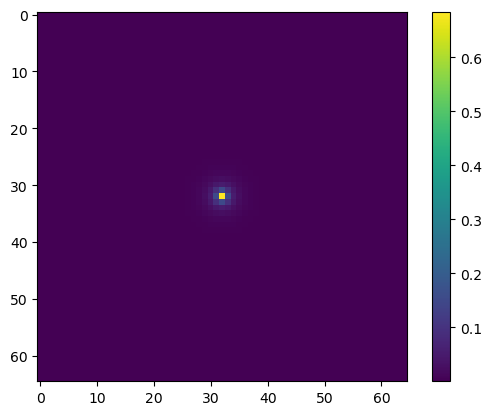

In [20]:
kernels = []

kernel_size = 65
resolution = (1.0, 1.0, 1.0)
tpr_20_10 = 0.72
pbm = PDRT.physics.PencilBeamModel(resolution=resolution, tpr_20_10=tpr_20_10, kernel_size=kernel_size)
rs = pbm.get_rs([kernel_size, kernel_size])
depths = np.arange(0.0, 50.0, 0.3)
print(len(depths))
for depth in depths:
    kernels.append(pbm.get_nested_kernels(torch.from_numpy(np.array([[[depth]]]))))

kernels = np.stack(kernels, 0)
print(kernels.shape)
plt.imshow(kernels[10, 0, 0, :, :])
plt.colorbar()
plt.show()

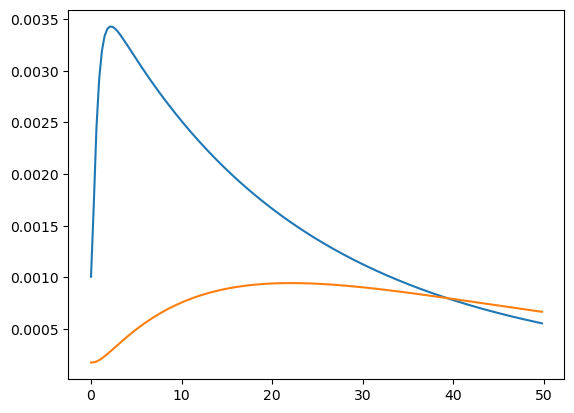

In [22]:
plt.plot(depths, pbm.depth_A_per_a(torch.from_numpy(depths)))
plt.plot(depths, pbm.depth_B_per_b(torch.from_numpy(depths)))

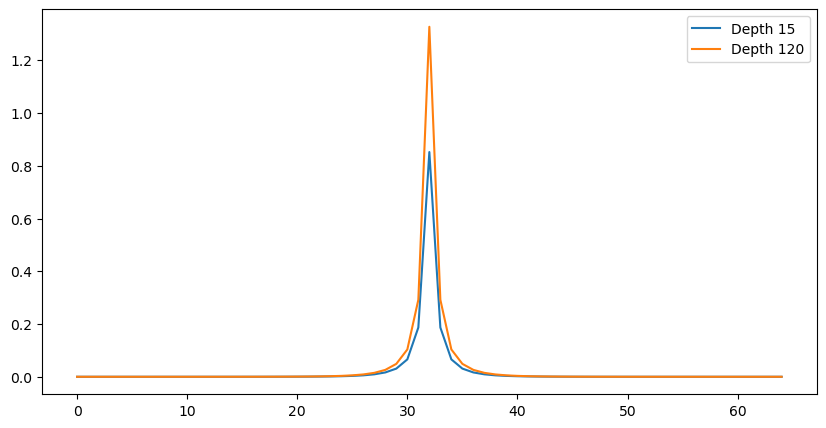

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(kernels[15, 0, 0, kernel_size // 2, :], label="Depth 15")
plt.plot(kernels[120, 0, 0, kernel_size // 2, :], label="Depth 120")
plt.legend()